In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [ ]:
doc = nlp("Apple Banana Citrus Jaguar")
for token in doc:
  print(token, "|", "Vector:", token.has_vector, "|", "OOV:", token.is_oov)

Apple | Vector: True | OOV: False
Banana | Vector: True | OOV: False
Citrus | Vector: True | OOV: False
Jaguar | Vector: True | OOV: False


In [ ]:
print(doc[1].vector.shape, "\n")
print(doc[1].vector)

(300,) 

[-1.0904   -0.96518  -0.90425   0.27293   3.0091   -0.32602   1.2871
 -1.6499   -2.4264   -0.16293  -1.7465    0.23708   0.78722   1.9681
 -0.75129  -3.7879   -0.35245  -0.45749   1.9974   -1.0901   -0.93305
  4.0495   -0.15365   0.95289  -0.45664  -0.38679  -0.911    -0.22659
  1.4476   -0.3633   -0.24278   0.11247   0.73205   3.053    -0.5224
 -0.24943  -0.77235  -2.3314   -3.2289   -2.9857    0.58035   0.29512
 -0.87031   4.9217    1.7204    1.2626   -1.1395    1.7295    0.14391
 -1.1656    1.0206   -1.4482   -0.73332   0.26432   3.9519    0.7155
 -0.30168   0.88795   1.4579    0.88959  -0.41828   1.0466    2.8533
 -1.8839   -2.2735   -1.7612   -3.1097   -1.5983    4.5238   -0.31454
 -3.9704    1.0313   -1.04      1.4153    0.55086   1.2715   -1.9727
 -0.55202   2.5421    2.0519    1.306     1.288    -2.3831    0.21316
  0.32286  -0.1548    3.1624    1.7117   -2.3028    0.72014   1.5489
  3.7901    1.5801   -2.4157    0.030789  0.37838   2.7239   -1.4153
 -1.6766   -3.7504 

In [ ]:
base_word = nlp("butter")

In [ ]:
doc = nlp("Humans like butter a lot")

for token in doc:
  print(f"{token.text} <-> {base_word.text}", token.similarity(base_word))

Humans <-> butter 0.06328486017529457
like <-> butter 0.37098684737067295
butter <-> butter 1.0000000136859037
a <-> butter 0.17205515522557976
lot <-> butter 0.2064057574792771


In [ ]:
def print_similarity(base_word, words_to_comapre):
  base_token = nlp(base_word)
  doc = nlp(words_to_comapre)
  for token in doc:
    print(f"{token.text} <-> {base_token.text}", token.similarity(base_token))

In [ ]:
print_similarity("iPhone", "Apple Samsung iPhone dog Cat")


Apple <-> iPhone 0.6810018183627308
Samsung <-> iPhone 0.6683552428198852
iPhone <-> iPhone 1.000000071105136
dog <-> iPhone 0.062353975727114645
Cat <-> iPhone 0.04523792210766395


In [ ]:
'''Text classification using spaCy word embedding'''
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Fake_Real_Data.csv")
df.head(10)

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
5,France says pressure needed to stop North Kore...,Real
6,"Trump on Twitter (August 8): Opioid crisis, No...",Real
7,BUSTED: Trump Supporter Used Poll Watcher Cre...,Fake
8,Fatal Niger operation sparks calls for public ...,Real
9,Trump says he has 'great heart' for immigrant ...,Real


In [ ]:
df.shape

(9900, 2)

In [ ]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [ ]:
df['label_numbers'] = df['label'].map({'Fake': 0, 'Real': 1})
df

,Text,label,label_numbers
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0
9896,Trump consults Republican senators on Fed chie...,Real,1
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0


In [ ]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [ ]:
df['vector'] = df['Text'].apply(lambda x: nlp(x).vector)

In [ ]:
df

,Text,label,label_numbers,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0,"[-1.6682401, 0.78006977, -2.2337353, -0.159771..."
9896,Trump consults Republican senators on Fed chie...,Real,1,"[-1.9297235, 0.8007302, -1.8990824, 0.42668718..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1,"[-1.5289013, 1.0250993, -1.9861357, 0.4278564,..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0,"[-1.3928099, 0.7792715, -2.2072845, 0.13192406..."


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.vector.values, df.label_numbers, test_size= 0.2, random_state = 42, stratify = df.label_numbers)


In [ ]:
X_train.shape

(7920,)

In [ ]:
X_test.shape

(1980,)

In [ ]:
X_train

array([array([-2.2457533 ,  0.65320826, -2.7725158 ,  0.8747301 ,  3.9705887 ,
               0.34412947,  0.6363758 ,  4.40048   , -0.36814636, -1.7059356 ,
               5.158274  ,  1.5977666 , -3.323812  ,  0.8802011 , -0.75339407,
               2.275317  ,  1.375348  , -0.53833604, -1.4414423 , -1.4935685 ,
               0.74112916, -0.5609842 , -0.10634569, -0.10488282, -0.05134682,
              -1.2014701 , -1.8361083 , -0.5364742 , -0.5741875 ,  0.69722974,
               0.6281593 ,  0.653397  , -0.7327885 , -2.0748553 , -1.6913083 ,
              -1.4858792 , -0.13013032,  0.5710199 ,  1.5206583 ,  0.75140154,
               0.4726915 , -0.28638417,  0.2716966 ,  0.04851696, -1.6000032 ,
               1.0947592 ,  1.4285504 , -1.7283762 , -0.45283288,  2.5119495 ,
              -1.2822536 ,  1.9568908 , -0.5509632 , -5.059848  , -1.2445847 ,
               0.8482583 ,  0.24925105,  0.7604755 ,  0.50298005, -0.45728618,
               0.97609574, -0.34358808,  0.47984326,

In [ ]:
'''Convert array(array) to 2-d array - stack()'''
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
X_train_2d

array([[-2.2457533 ,  0.65320826, -2.7725158 , ..., -0.6018606 ,
        -1.9761672 ,  1.2640717 ],
       [-2.0815852 ,  0.80192417, -1.6333157 , ..., -1.4228109 ,
        -2.0243683 ,  0.7941047 ],
       [-1.4317232 ,  0.9634989 , -2.395704  , ..., -0.5920523 ,
        -2.1728992 ,  1.4585347 ],
       ...,
       [-1.1563656 ,  0.5925829 , -2.0635247 , ..., -0.38524142,
        -3.147508  ,  0.48102516],
       [-1.5729591 , -1.1824213 , -0.35044044, ..., -1.6236205 ,
        -0.87901765,  0.66218275],
       [-1.4754695 ,  0.6491189 , -1.6219752 , ..., -0.7713741 ,
        -2.5889263 ,  0.66068506]], dtype=float32)

In [ ]:
 from sklearn.naive_bayes import MultinomialNB
 from sklearn.preprocessing import MinMaxScaler

 scaling = MinMaxScaler()
 scaled_X_train = scaling.fit_transform(X_train_2d)
 scaled_X_test = scaling.transform(X_test_2d)
 classifier_NB = MultinomialNB()

In [ ]:
classifier_NB.fit(scaled_X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier_NB.predict(scaled_X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
Classification_Report = classification_report(y_test, y_pred)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1000
           1       0.94      0.95      0.94       980

    accuracy                           0.94      1980
   macro avg       0.94      0.95      0.94      1980
weighted avg       0.95      0.94      0.94      1980



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric= "euclidean")
classifier_KNN.fit(X_train_2d, y_train)
y_pred = classifier_KNN.predict(X_test_2d)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
Classification_Report = classification_report(y_test, y_pred)
print(Classification_Report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [ ]:
'''Gensim: https://radimrehurek.com/gensim/index.html'''

!pip install gensim

In [ ]:
import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import pandas as pd

df = pd.read_csv('/content/fake_and_real_news.csv')
df.head(10)

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
5,France says pressure needed to stop North Kore...,Real
6,"Trump on Twitter (August 8): Opioid crisis, No...",Real
7,BUSTED: Trump Supporter Used Poll Watcher Cre...,Fake
8,Fatal Niger operation sparks calls for public ...,Real
9,Trump says he has 'great heart' for immigrant ...,Real


In [ ]:
df['label_number'] = df['label'].map({'Fake': 0, 'Real':1})
df

,Text,label,label_number
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0
9896,Trump consults Republican senators on Fed chie...,Real,1
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0


In [ ]:
import spacy

nlp = spacy.load("en_core_web_lg")


def preprocess_vector(text):
  doc = nlp(text)

  filtered_tokens = []
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    filtered_tokens.append(token.lemma_)

  return wv.get_mean_vector(filtered_tokens)


In [ ]:
'''Sample'''
preprocess_vector("Don't worry, Try your level best to get succeed")

array([ 0.01770505,  0.03036039,  0.0067107 ,  0.03990709, -0.04901626,
        0.00489466,  0.07182364, -0.01242031,  0.02458442, -0.00647437,
       -0.00856545, -0.03297256,  0.03031676, -0.00031977, -0.0742033 ,
        0.05173521,  0.02748722,  0.08320541,  0.01441847, -0.07272552,
       -0.01338103,  0.02338163,  0.02898107,  0.00135686,  0.05261224,
        0.00790399, -0.02672243, -0.03038961,  0.0061605 , -0.0066915 ,
       -0.00374243,  0.00237933,  0.02173024, -0.04096148,  0.00659461,
        0.01844526,  0.02438666,  0.02874354,  0.00574371,  0.03948301,
        0.06375019, -0.04828053,  0.05934804, -0.01363567, -0.08119987,
        0.00815001,  0.00947649,  0.00414868,  0.00122126,  0.04997419,
       -0.0173559 ,  0.05654143, -0.01167848, -0.01812209,  0.00767883,
       -0.00710464, -0.03137643, -0.05406081,  0.01698626, -0.06544576,
       -0.00731762,  0.01594951, -0.07636473,  0.01437689,  0.02805201,
       -0.00147185,  0.00247176,  0.05894208, -0.0336982 ,  0.03

In [ ]:
'''
Concept understanding:

worry - [] (300 size vector)
try - [] (300 size vector)
level - [] (300 size vector)
.
.
.
Average - [] (300 size vector)  ------> This is the sentence embedding
'''

import numpy as np
v1 = wv["worry"]
v2 = wv["try"]
print(np.mean([v1, v2], axis = 0).shape)
np.mean([v1, v2], axis = 0)[:5]

(300,)


array([ 0.17456055,  0.11987305,  0.09063721,  0.14697266, -0.112854  ],
      dtype=float32)

In [ ]:
'''https://radimrehurek.com/gensim/models/keyedvectors.html'''
wv.get_mean_vector(["worry", "try"], pre_normalize= False)[:5]

array([ 0.17456055,  0.11987305,  0.09063721,  0.14697266, -0.112854  ],
      dtype=float32)

In [ ]:
df['text_vector'] = df['Text'].apply(lambda text: preprocess_vector(text))
df

,Text,label,label_number,text_vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0,"[0.009046372, 0.015129782, -0.00394294, 0.0316..."
9896,Trump consults Republican senators on Fed chie...,Real,1,"[0.010050427, 0.0036850946, -0.0031512326, 0.0..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1,"[0.0032499663, 0.004776459, 0.010537294, -0.00..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0,"[0.0055283327, 0.014677874, 0.00027507733, 0.0..."


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text_vector.values, df.label_number, test_size= 0.2, random_state = 42, stratify = df.label_number)


In [ ]:
X_train

array([array([ 0.01699186,  0.00606068, -0.00181136,  0.03706748, -0.02091151,
              -0.02770985,  0.01699675, -0.0046849 ,  0.04276943,  0.01539288,
              -0.02173352, -0.00241024, -0.00597748,  0.02406912, -0.04185797,
               0.03562947,  0.02551949,  0.02738844,  0.0049735 , -0.01688608,
               0.00812327,  0.0177418 ,  0.02149127, -0.00644702,  0.00762452,
               0.01782812, -0.01643803,  0.00155672,  0.01070213,  0.01138513,
              -0.00278474, -0.01420701, -0.01784927, -0.02460732,  0.00111305,
              -0.01559755,  0.01622148,  0.01160502, -0.00224618,  0.03639604,
               0.02734412, -0.00694432,  0.05182163, -0.00821712, -0.05005617,
              -0.0225724 , -0.00276359,  0.02091858, -0.0251872 ,  0.01889496,
               0.00502806,  0.00415992, -0.01292364, -0.02155379, -0.00056703,
               0.00170683, -0.03396309, -0.01619065, -0.00424485, -0.0153833 ,
              -0.00852692,  0.00619573, -0.0375377 ,

In [ ]:
'''Convert array(array) to 2-d array - stack()'''
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier_GBC = GradientBoostingClassifier()
classifier_GBC

GradientBoostingClassifier()

In [ ]:
classifier_GBC.fit(X_train_2d, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = classifier_GBC.predict(X_test_2d)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
Classification_Report = classification_report(y_test, y_pred)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1000
           1       0.97      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [ ]:
test_sample = [
    "Federal Lawsuit Filed Against Trump Over Financial Disclosure (DETAILS) It looks like Donald Trump can add another case to the list of lawsuits he is facing. An attorney, based in Washington, D.C., has filed suit in federal court alleging that the financial disclosure Trump filed in May 2016 was not even close to accurate.Jeffrey Lovitky filed the lawsuit on March 14. According to Politico, Trump mixed his personal liabilities in with his business liabilities, making it impossible for voters to get a true picture of his potential conflicts of interest. The purpose of these disclosure requirements is to allow members of the public to make informed judgments as to whether candidates for federal office have financial conflicts of interests that may impair their ability to faithfully execute their duties as public servants,  Lovitky explained in the complaint.Lovitky s suit does not accuse Trump of any improprieties, but it does allege that the public has not been given truthful information regarding Trump s many debts due to the lack of clarity in the financial disclosure. If you just look at the statement on its face, all those liabilities are assumed to be personal liabilities, but I just do not think that s the case. I have information that says otherwise,  Lovitky said during an interview with Politico.When Lovitky was asked why he decided to pursue this issue in court, he said that when it comes to Trump, there are  very serious concerns about conflicts of interest. It s mostly the fact that with this president there are very serious concerns about conflicts of interest in this particular administration, and I think it s important that those concerns be addressed thoroughly,  the attorney explained.Lovitky is not seeking damages in the suit and is only asking the court to declare Trump s financial disclosure illegal and order him to file a new one that accurately represents his personal debts. Currently, his next financial closure is not scheduled to be released until May 2018. U.S. District Court Judge Colleen Kollar-Kotelly, who was appointed by Bill Clinton, has been assigned the case.Featured image via Justin Sullivan/Getty Images",
    "U.S. appeals court ruling on Trump's revised travel ban imminent (Reuters) - A U.S. appeals court is set to rule on Monday on whether to uphold President Donald Trumpâ€™s temporary travel ban, a court official from the 9th U.S. Circuit Court of Appeals in San Francisco said.  The court is reviewing a March ruling by a Hawaii-based federal judge that blocked parts of Trumpâ€™s order that aimed to temporarily halt the entry of people from six Muslim-majority nations and refugees.",
    "Departure of communications aide could be first in Trump shake-up WASHINGTON (Reuters) - U.S. President Donald Trumpâ€™s communications director is leaving the job, the White House said on Tuesday, as the president considers wider staff changes to try to contain political damage from investigations into Russia and his presidential campaign.  Mike Dubke confirmed reports he had resigned, saying in a statement, â€œIt has been my great honor to serve President Trump and this administration.â€ Dubke, who had been in the job just three months, gave no reason for leaving. Trump, who returned to Washington on Saturday after a nine-day trip to the Middle East and Europe, has been expected to shake up staff to tackle the firestorm over investigations into alleged Russian meddling in the 2016 presidential election and communication between Russia and Trumpâ€™s campaign and transition team.  Trump plans to bring in new aides to the White House, adding experienced political professionals including a former campaign manager, according to administration officials and people close to the president. Dubke, who was joined the White House in March to head the office that runs press and other public relations issues, oversees the White Houseâ€™s message strategy while spokesman Sean Spicer, a more high-profile figure, handles daily media briefings.  The Republican president came home to face more questions on Russia after media reports about communications during and after the campaign between his son-in-law and close adviser, Jared Kushner, and Russiaâ€™s ambassador to Washington. Spicer was asked on Tuesday whether Trump knew about reported efforts by Kushner in December to set up a back channel for communications with Russia. â€œWhat your question assumes is a lot of facts that are not substantiated by anything but anonymous sources that are so far being leaked out,â€ he told a news briefing. Asked about a possible staff shake-up, Spicer said: â€œI think the president is very pleased with his team and he has a robust agenda.â€  Dubke resigned just before Trump left on his foreign trip but will stay on until a transition is concluded, Reince Priebus, the White House chief of staff, said.        Other potential staff changes could be in the works, according to Axios News, which first reported Dubkeâ€™s departure, including fewer on-camera news briefings by Spicer, the White House press secretary.  Trump also will take more questions directly from the media, Axios reported.  â€œUltimately the best messenger is the president himself,â€ Spicer said on Tuesday. Senior adviser Kellyanne Conway told Fox News the White House will continue to bring in Cabinet secretaries and other top officials to handle news briefings on topics in their patch. Conway also dismissed persistent speculation that Spicer, who has been pilloried on TV comedy shows since Trump took office on Jan. 20, was on his way out.  Controversy over the Russia issue deepened after Trump fired FBI Director James Comey earlier this month, leading to allegations by critics that the president sought to hamper the agencyâ€™s investigation of the matter. Moscow has denied U.S. intelligence agenciesâ€™ conclusion that it meddled in the campaign to try to tilt the election in Trumpâ€™s favor. The president has denied any collusion, repeatedly denouncing the probes by a special counsel at the Justice Department, the FBI and several congressional panels as a Democrat-backed effort to explain Hillary Clintonâ€™s upset defeat in the White House race. Congressional investigations into the Russia issue have expanded to include Trumpâ€™s personal attorney, Michael Cohen, ABC News reported on Tuesday. Cohen confirmed he had been asked to provide information and testimony to investigators in the U.S. House of Representatives and the Senate but said he declined because â€œthe request was poorly phrased, overly broad and not capable of being answered,â€ ABC reported.  Cohen did not respond to Reutersâ€™ request to comment. The White House declined to comment, saying Cohen is not an employee of the administration. However, former White House national security adviser Michael Flynn, who resigned after failing to properly disclose his own contacts with Russian officials, told the Senate Intelligence Committee he will begin turning over some documents subpoenaed by the panel, a government source familiar with the matter told Reuters.",
    "Instead Of Tip, â€˜Christianâ€™ Trump Supporter Leaves Waitress UNBELIEVABLY Sexist Note (IMAGE) Donald Trump is a disease. The symptoms have always been with us. We ve always been a nation that s at least 1/3 completely bigoted a**holes, but this year, Donald Trump has given them permission to fester and spread their hate germs all over the nation.Instead of receiving a tip, a waitress in South Carolina received a note. You re right if you re thinking that never ends well. It didn t. In the note, the obvious Trump supporter told the waitress that she was a disgrace to womankind and a disgrace to her husband   because she worked.Thank you for your excellent service today   you re a good waitress.Here s your tip:The woman s place is in the home. Your place is in the home. It even says so in the Bible. You may think that you re contributing to your household by coming into work, but you re not. While you re in here  working  this is the reason your husband must see another woman on his way home from a long day at his work. Because you should be home taking care of the household duties, you may think what you are doing  working  is right, it is really essentially a disgrace to his manhood and to the American family. So instead of coming to your  job  and looking for handouts to feed your family, how s about going home and cleaning your house and cooking a hot meal for your husband and children, the way your husband and God intended, and help make America great again. Praying for families and our nation.Notice  make America great again?  Obviously, that was a reference to Donald Trump. And obviously, this person has no idea what Christianity is about.The waitress did respond that she  felt mortified, embarrassed, humiliated even. I felt hurt and a bit heartbroken.  She says she s not even married, but she does have a boyfriend who is supportive.Most waitresses don t work because they have nothing better to do. Most people don t work because they have nothing better to do. People, and waitresses are no exception, work because they need money to survive. Most families these days need two incomes, but conservatives don t want to do anything to help them. Instead, they destroy unions, drive down wages and take away benefits. I m not a religious person, but something makes me think Jesus wouldn t approve.h/t and featured image: Patheos |"
]

predit_vectors = [preprocess_vector(s) for s in test_sample]

In [ ]:
classifier_GBC.predict(predit_vectors)

array([0, 1, 1, 0])

It worked.....

In [ ]:
confusion_matrix= confusion_matrix(y_test, y_pred)
confusion_matrix

from matplotlib import pyplot as plot
import seaborn as sbn


Text(70.72222222222221, 0.5, 'Truth')

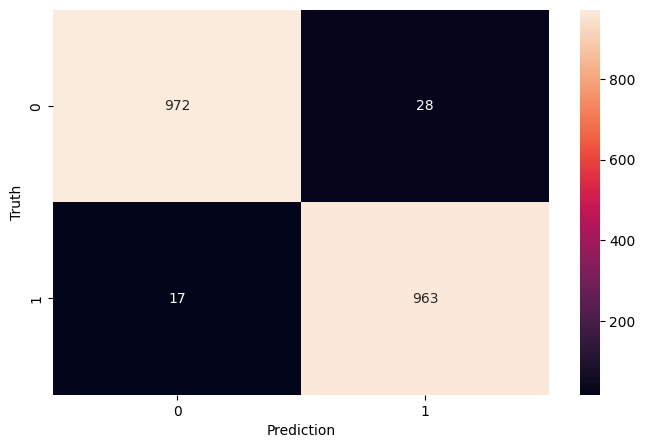

In [ ]:
plot.figure(figsize=(8,5))
sbn.heatmap(confusion_matrix, annot= True, fmt = 'd')
plot.xlabel("Prediction")
plot.ylabel("Truth")

In [ ]:
'''https://fasttext.cc/'''

!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227146 sha256=cd42f178fb5f388991dbbe9b29acd9d556617afe2d2e6e97a805799cba5657d0
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext
